In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df['doornumber'] = df['doornumber'].replace({'two': 2, 'four': 4})
df['cylindernumber']=df['cylindernumber'].replace({'four':4,'six':6,'eight':8,'twelve':12,'five':5,'three':3,'two':2})
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
# Perform one-hot encoding
df = pd.get_dummies(df, columns=['fueltype','aspiration','carbody','drivewheel','enginetype','fuelsystem'])
df

,car_ID,symboling,CarName,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,2,front,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,True,False,False
1,2,3,alfa-romero stelvio,2,front,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,True,False,False
2,3,1,alfa-romero Quadrifoglio,2,front,94.5,171.2,65.5,52.4,2823,...,True,False,False,False,False,False,False,True,False,False
3,4,2,audi 100 ls,4,front,99.8,176.6,66.2,54.3,2337,...,False,False,False,False,False,False,False,True,False,False
4,5,2,audi 100ls,4,front,99.4,176.6,66.4,54.3,2824,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),4,front,109.1,188.8,68.9,55.5,2952,...,False,False,False,False,False,False,False,True,False,False
201,202,-1,volvo 144ea,4,front,109.1,188.8,68.8,55.5,3049,...,False,False,False,False,False,False,False,True,False,False
202,203,-1,volvo 244dl,4,front,109.1,188.8,68.9,55.5,3012,...,True,False,False,False,False,False,False,True,False,False
203,204,-1,volvo 246,4,front,109.1,188.8,68.9,55.5,3217,...,False,False,False,False,False,True,False,False,False,False


In [7]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# label encoding to the 'symboling' column
df['symboling'] = label_encoder.fit_transform(df['symboling'])

df['doornumber'] = label_encoder.fit_transform(df['doornumber'])

df['cylindernumber'] = label_encoder.fit_transform(df['cylindernumber'])
df[['symboling' ,'doornumber','cylindernumber']]

,symboling,doornumber,cylindernumber
0,5,0,2
1,5,0,2
2,3,0,4
3,4,1,2
4,4,1,3
...,...,...,...
200,1,1,2
201,1,1,2
202,1,1,4
203,1,1,4


In [9]:
#Perform Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming you've already defined 'x' and 'y' as your feature and target variables
x = df[['car_ID','symboling', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']]

y = df['price']

# Split the data into training and testing sets(70% training,30% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

# Create a LinearRegression model
reg = LinearRegression()

# Fit the model on the training data
reg.fit(x_train, y_train)

# Make predictions on the test data
pred = reg.predict(x_test)

In [10]:
print("Coefficients:", reg.coef_)

Coefficients: [-1.78672878e+01 -5.83791369e+01  3.83498636e+02  1.16774756e+02
 -4.01038743e+01  5.28609218e+02  1.25921091e+02  5.58844775e-01
 -1.20568448e+03  1.53948893e+02 -2.32385355e+03 -5.03842286e+03
  3.96099912e+02  3.97482673e+01  1.89295829e+00 -2.50360340e+02
  1.49651077e+02]


In [11]:
print(x_test.index)

print(y_test.index)

Index([151, 164, 192,  81, 125,  48, 168, 112,  97, 110,  24, 179,  23, 128,
       111, 190,  53,  49,  99, 182,  95, 200, 102, 133,  51, 144,  56,  63,
       108,  30, 146, 170,  12,  15,   6, 137, 136, 100,  83,   9, 141, 148,
        41,  27, 181,  18,  73,  43, 115,  92,  22,   7,  19, 109, 159,  88,
         4,  10, 157,  25, 165,  80],
      dtype='int64')
Index([151, 164, 192,  81, 125,  48, 168, 112,  97, 110,  24, 179,  23, 128,
       111, 190,  53,  49,  99, 182,  95, 200, 102, 133,  51, 144,  56,  63,
       108,  30, 146, 170,  12,  15,   6, 137, 136, 100,  83,   9, 141, 148,
        41,  27, 181,  18,  73,  43, 115,  92,  22,   7,  19, 109, 159,  88,
         4,  10, 157,  25, 165,  80],
      dtype='int64')


In [12]:
x_test.loc[12]

car_ID                13.00
symboling              2.00
doornumber             0.00
wheelbase            101.20
carlength            176.80
carwidth              64.80
carheight             54.30
curbweight          2710.00
cylindernumber         4.00
enginesize           164.00
boreratio              3.31
stroke                 3.19
compressionratio       9.00
horsepower           121.00
peakrpm             4250.00
citympg               21.00
highwaympg            28.00
Name: 12, dtype: float64

In [13]:
y_test.loc[12]

20970.0

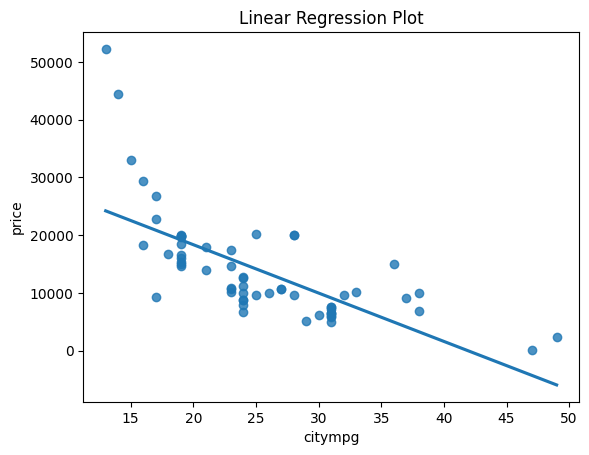

In [21]:
sns.regplot(x=x_test.citympg, y=pred, ci=None)
plt.xlabel('citympg')
plt.ylabel('price')
plt.title('Linear Regression Plot')
plt.show()

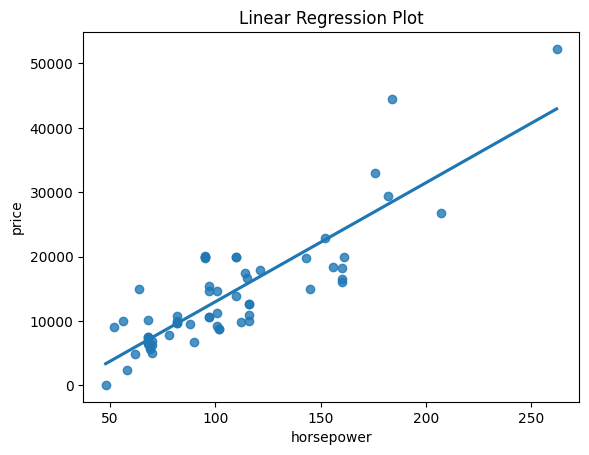

In [22]:
sns.regplot(x=x_test.horsepower, y=pred, ci=None)
plt.xlabel('horsepower')
plt.ylabel('price')
plt.title('Linear Regression Plot')
plt.show()

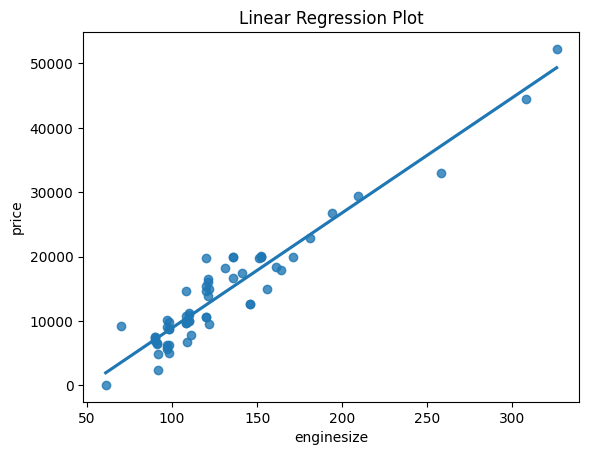

In [23]:
sns.regplot(x=x_test.enginesize, y=pred, ci=None)
plt.xlabel('enginesize')
plt.ylabel('price')
plt.title('Linear Regression Plot')
plt.show()

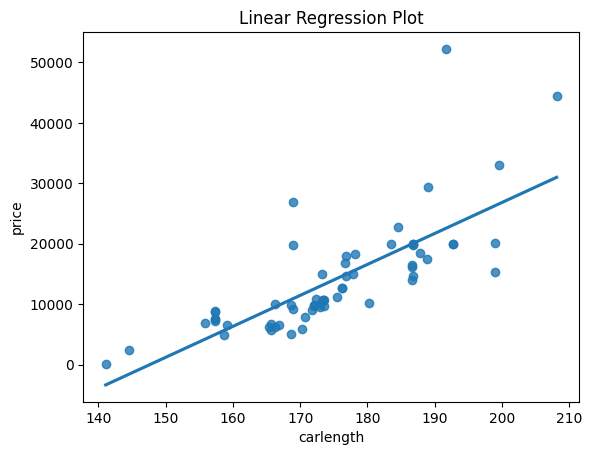

In [24]:
sns.regplot(x=x_test.carlength, y=pred, ci=None)
plt.xlabel('carlength')
plt.ylabel('price')
plt.title('Linear Regression Plot')
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error

# Get the intercept (bias) of the model
intercept = reg.intercept_
print("Intercept:", intercept)

# Calculate the R-squared score on the test data
r_squared = reg.score(x_test, y_test)
print("R-squared:", r_squared)

# Calculate the mean squared error (MSE) on the test data
mse = mean_squared_error(y_test, pred)
print("Mean Squared Error (MSE):", mse)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Intercept: -41057.04600392354
R-squared: 0.7978769615999375
Mean Squared Error (MSE): 13067166.854706762
Root Mean Squared Error (RMSE): 3614.853642224919
